In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Datos_limpios.csv")
df.head(5)

,Unnamed: 0,host_name,host_since,host_response_time,property_type,room_type,bathrooms_text,first_review,last_review,host_response_rate,...,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_num,first_review_num,last_review_num
0,0,Rita,26/11/2010,within a few hours,Entire condo,Entire home/apt,1 bath,29/12/2010,30/04/2025,1.0,...,4.78,0,1.0,1.0,0.0,0.0,0.32,417,4827.0,3433.0
1,1,Michelle,19/11/2012,within an hour,Entire condo,Entire home/apt,1 bath,01/02/2013,27/07/2024,1.0,...,4.76,0,1.0,1.0,0.0,0.0,0.46,1141,4827.0,3521.0
2,2,Judy,27/12/2012,within an hour,Private room in home,Private room,1 private bath,29/08/2016,30/09/2023,1.0,...,4.83,0,2.0,0.0,0.0,0.0,0.66,1179,4827.0,3521.0
3,3,Joan,23/04/2013,within an hour,Entire rental unit,Entire home/apt,1 bath,02/06/2013,29/10/2024,1.0,...,4.66,1,9.0,9.0,0.0,0.0,0.65,1296,4827.0,3521.0
4,4,C. F. Sandy,13/06/2013,within a day,Private room in home,Private room,1 shared bath,23/04/2017,09/11/2019,1.0,...,4.53,0,1.0,0.0,0.0,0.0,0.30,1347,4827.0,3521.0


In [3]:
# DataFrame con solo variables cuantitativas (numéricas)
cuantitativas = df.select_dtypes(include=["int64", "float64", "int32", "float32", "int", "float"])
print("Columnas cuantitativas:\n", cuantitativas.columns.tolist())

Columnas cuantitativas:
 ['Unnamed: 0', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_365', 'number_of_reviews', 'availability_eoy', 'number_of_reviews_ly', 'estimated_occupancy_l365d', 'estimated_revenue_l365d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'

In [4]:
# Ajustar maximo de columnas
pd.options.display.max_columns = None

In [5]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factorsdf=cuantitativas.corr()
Corr_Factorsdf

,Unnamed: 0,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_365,number_of_reviews,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_num,first_review_num,last_review_num
Unnamed: 0,1.000000,-0.125618,-0.060364,-0.099188,0.089805,NaN,NaN,-0.053238,-0.058934,0.012466,-0.026005,-0.030091,-0.001186,-0.138909,-0.116904,NaN,-0.103132,-0.026332,-0.306741,-0.298958,-0.059556,-0.314659,NaN,0.127493,-0.297216,0.105443,-0.286741,-0.214850,-0.209337,-0.059026,-0.011500,-0.040518,-0.102803,-0.080635,-0.108161,-0.000239,0.181553,0.069727,0.069814,NaN,NaN,0.225700,0.473692,0.740584,0.146236
host_response_rate,-0.125618,1.000000,0.001838,0.136555,-0.010214,NaN,NaN,-0.114453,-0.001642,0.038670,0.100805,0.084727,0.050007,0.053540,0.120986,NaN,0.043647,0.094795,0.135380,-0.055399,0.118822,0.034401,NaN,-0.065469,0.140274,-0.108552,0.102489,0.133331,0.111937,0.097285,0.079927,0.100060,0.092265,0.125852,0.032430,0.066645,-0.217891,-0.014575,0.013008,NaN,NaN,0.031659,-0.143736,-0.033310,-0.043707
host_acceptance_rate,-0.060364,0.001838,1.000000,0.003378,-0.079378,NaN,NaN,-0.013674,-0.018258,0.014033,0.010354,-0.001694,0.025382,0.063545,0.006454,NaN,0.012587,-0.012346,0.163721,0.155687,-0.029858,0.163894,NaN,0.093106,0.053776,0.036053,0.021522,0.065963,0.066838,-0.007032,-0.014017,0.009537,-0.011483,0.000612,0.003480,-0.013608,0.216214,-0.080392,-0.083281,NaN,NaN,0.062885,-0.006654,-0.053994,0.092012
host_is_superhost,-0.099188,0.136555,0.003378,1.000000,-0.070840,NaN,NaN,-0.063001,-0.033261,0.048593,0.077333,0.089316,0.061418,0.096307,0.005015,NaN,-0.048061,0.037639,0.123967,0.071327,0.041856,0.096889,NaN,-0.024379,0.224392,-0.109715,0.168670,0.377678,0.346718,0.357076,0.247856,0.305859,0.275877,0.325521,0.136908,0.267560,-0.081237,-0.060859,-0.022630,NaN,NaN,0.162274,-0.098301,-0.035842,0.006647
host_total_listings_count,0.089805,-0.010214,-0.079378,-0.070840,1.000000,NaN,NaN,0.035228,-0.000673,0.071004,0.007272,0.022568,0.044826,-0.059557,-0.036517,NaN,-0.030597,0.090636,0.006390,-0.010834,0.104895,-0.004874,NaN,0.063626,-0.002830,0.079688,0.025010,-0.011598,-0.046405,-0.167497,-0.128794,-0.145220,-0.119964,-0.115301,-0.089489,-0.148337,0.091959,0.642858,0.576308,NaN,NaN,0.016502,0.054599,-0.000106,0.009634
host_has_profile_pic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,-0.053238,-0.114453,-0.013674,-0.063001,0.035228,NaN,NaN,1.000000,0.183366,-0.048554,-0.030348,-0.026138,-0.036529,0.047264,0.007930,NaN,0.048523,0.003362,-0.009037,0.038771,-0.001773,0.021342,NaN,-0.039702,-0.083380,-0.031493,-0.073120,-0.080580,-0.059778,0.005919,0.013406,-0.005482,0.014908,-0.014671,0.117821,-0.019120,0.012845,0.007920,0.050022,NaN,NaN,-0.128833,-0.081546,-0.050506,-0.045372
longitude,-0.058934,-0.001642,-0.018258,-0.033261,-0.000673,NaN,NaN,0.183366,1.000000,-0.014495,-0.042654,-0.056403,-0.009529,-0.022573,-0.032339,NaN,0.032592,-0.008808,0.028176,0.028698,-0.002140,0.030165,NaN,-0.

In [6]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables GENERAL para regresion multiple
Corr_factordf= abs(Corr_Factorsdf)
Corr_factordf

,Unnamed: 0,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_365,number_of_reviews,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_num,first_review_num,last_review_num
Unnamed: 0,1.000000,0.125618,0.060364,0.099188,0.089805,NaN,NaN,0.053238,0.058934,0.012466,0.026005,0.030091,0.001186,0.138909,0.116904,NaN,0.103132,0.026332,0.306741,0.298958,0.059556,0.314659,NaN,0.127493,0.297216,0.105443,0.286741,0.214850,0.209337,0.059026,0.011500,0.040518,0.102803,0.080635,0.108161,0.000239,0.181553,0.069727,0.069814,NaN,NaN,0.225700,0.473692,0.740584,0.146236
host_response_rate,0.125618,1.000000,0.001838,0.136555,0.010214,NaN,NaN,0.114453,0.001642,0.038670,0.100805,0.084727,0.050007,0.053540,0.120986,NaN,0.043647,0.094795,0.135380,0.055399,0.118822,0.034401,NaN,0.065469,0.140274,0.108552,0.102489,0.133331,0.111937,0.097285,0.079927,0.100060,0.092265,0.125852,0.032430,0.066645,0.217891,0.014575,0.013008,NaN,NaN,0.031659,0.143736,0.033310,0.043707
host_acceptance_rate,0.060364,0.001838,1.000000,0.003378,0.079378,NaN,NaN,0.013674,0.018258,0.014033,0.010354,0.001694,0.025382,0.063545,0.006454,NaN,0.012587,0.012346,0.163721,0.155687,0.029858,0.163894,NaN,0.093106,0.053776,0.036053,0.021522,0.065963,0.066838,0.007032,0.014017,0.009537,0.011483,0.000612,0.003480,0.013608,0.216214,0.080392,0.083281,NaN,NaN,0.062885,0.006654,0.053994,0.092012
host_is_superhost,0.099188,0.136555,0.003378,1.000000,0.070840,NaN,NaN,0.063001,0.033261,0.048593,0.077333,0.089316,0.061418,0.096307,0.005015,NaN,0.048061,0.037639,0.123967,0.071327,0.041856,0.096889,NaN,0.024379,0.224392,0.109715,0.168670,0.377678,0.346718,0.357076,0.247856,0.305859,0.275877,0.325521,0.136908,0.267560,0.081237,0.060859,0.022630,NaN,NaN,0.162274,0.098301,0.035842,0.006647
host_total_listings_count,0.089805,0.010214,0.079378,0.070840,1.000000,NaN,NaN,0.035228,0.000673,0.071004,0.007272,0.022568,0.044826,0.059557,0.036517,NaN,0.030597,0.090636,0.006390,0.010834,0.104895,0.004874,NaN,0.063626,0.002830,0.079688,0.025010,0.011598,0.046405,0.167497,0.128794,0.145220,0.119964,0.115301,0.089489,0.148337,0.091959,0.642858,0.576308,NaN,NaN,0.016502,0.054599,0.000106,0.009634
host_has_profile_pic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,0.053238,0.114453,0.013674,0.063001,0.035228,NaN,NaN,1.000000,0.183366,0.048554,0.030348,0.026138,0.036529,0.047264,0.007930,NaN,0.048523,0.003362,0.009037,0.038771,0.001773,0.021342,NaN,0.039702,0.083380,0.031493,0.073120,0.080580,0.059778,0.005919,0.013406,0.005482,0.014908,0.014671,0.117821,0.019120,0.012845,0.007920,0.050022,NaN,NaN,0.128833,0.081546,0.050506,0.045372
longitude,0.058934,0.001642,0.018258,0.033261,0.000673,NaN,NaN,0.183366,1.000000,0.014495,0.042654,0.056403,0.009529,0.022573,0.032339,NaN,0.032592,0.008808,0.028176,0.028698,0.002140,0.030165,NaN,0.013915,0.034299,0.037805,0.032247,0.005503,0.022799,0.037963,0.021917,0.030952,0.002791,0.032875,0.014611,0.023121,0.006002

In [7]:
# --- Encontrar variables más correlacionadas con una variable dependiente ---
# Variable dependiente (puedes cambiarla aquí)
var_dep = "review_scores_rating"

# Calculamos todas las correlaciones de esa variable con el resto
correls = df.corr(numeric_only=True)[var_dep].drop(var_dep)   # quitamos la propia variable

# Ordenamos por valor absoluto de mayor a menor
correls_abs = correls.abs().sort_values(ascending=False)

# Mostramos el top 5 (o el número que quieras)
print(f"Variables más correlacionadas con {var_dep}:\n")
print(correls_abs.head(5))

# Si quieres ver también el signo original:
print("\nCon signo original:\n")
print(correls.loc[correls_abs.index[:5]])

Variables más correlacionadas con review_scores_rating:

review_scores_value            0.720315
review_scores_cleanliness      0.701213
review_scores_accuracy         0.690866
review_scores_communication    0.642845
review_scores_checkin          0.566699
Name: review_scores_rating, dtype: float64

Con signo original:

review_scores_value            0.720315
review_scores_cleanliness      0.701213
review_scores_accuracy         0.690866
review_scores_communication    0.642845
review_scores_checkin          0.566699
Name: review_scores_rating, dtype: float64


In [8]:
#Declaramos las variables dependientes e independientes para la regresión lineal LAS MAS ALTAS en el general
Vars_Indep= df[['review_scores_value', 'review_scores_cleanliness','review_scores_accuracy']]
Var_Dep= df['review_scores_rating']

In [9]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [10]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [11]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_value', 'review_scores_cleanliness',
        'review_scores_accuracy'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.37527929, 0.33614272, 0.35652815]),
 'rank_': 3,
 'singular_': array([15.83683614,  7.28434908,  5.09992082]),
 'intercept_': -0.33976536675012436}

In [12]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.6594290311215163

In [13]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['review_scores_value', 'review_scores_cleanliness','review_scores_accuracy']])
y_pred

array([4.71502268, 4.86774657, 4.8257683 , ..., 4.71525318, 4.71525318,
       4.71525318])

In [14]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones', y_pred)
df

,Predicciones,Unnamed: 0,host_name,host_since,host_response_time,property_type,room_type,bathrooms_text,first_review,last_review,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_365,number_of_reviews,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_num,first_review_num,last_review_num
0,4.715023,0,Rita,26/11/2010,within a few hours,Entire condo,Entire home/apt,1 bath,29/12/2010,30/04/2025,1.0,0.80,1,3.0,1.0,1.0,32.816900,-96.820180,3.0,1.0,1.0,2.0,80.0,1.0,365.0,1.0,2.0,1125.0,1125.0,2.0,1125.0,1,352,57.0,122.0,0.0,120,9600.0,4.71,4.80,4.61,4.85,4.93,4.76,4.78,0,1.0,1.0,0.0,0.0,0.32,417,4827.0,3433.0
1,4.867747,1,Michelle,19/11/2012,within an hour,Entire condo,Entire home/apt,1 bath,01/02/2013,27/07/2024,1.0,1.00,0,4.0,1.0,1.0,32.803270,-96.809760,2.0,1.0,1.0,1.0,244.0,1.0,365.0,1.0,2.0,365.0,365.0,2.0,365.0,1,270,71.0,135.0,1.0,0,0.0,4.85,4.91,4.97,4.91,4.97,4.91,4.76,0,1.0,1.0,0.0,0.0,0.46,1141,4827.0,3521.0
2,4.825768,2,Judy,27/12/2012,within an hour,Private room in home,Private room,1 private bath,29/08/2016,30/09/2023,1.0,1.00,1,3.0,1.0,1.0,32.855090,-96.706250,2.0,1.0,1.0,1.0,45.0,1.0,365.0,1.0,7.0,730.0,730.0,7.0,730.0,1,256,72.0,121.0,0.0,0,0.0,4.83,4.86,4.82,4.93,4.93,4.92,4.83,0,2.0,0.0,0.0,0.0,0.66,1179,4827.0,3521.0
3,4.687508,3,Joan,23/04/2013,within an hour,Entire rental unit,Entire home/apt,1 bath,02/06/2013,29/10/2024,1.0,0.98,0,11.0,1.0,1.0,32.818684,-96.790154,2.0,1.0,0.0,1.0,93.0,3.0,365.0,3.0,3.0,1125.0,1125.0,3.0,1125.0,1,338,97.0,108.0,5.0,18,1674.0,4.61,4.67,4.80,4.73,4.63,4.94,4.66,1,9.0,9.0,0.0,0.0,0.65,1296,4827.0,3521.0
4,4.649417,4,C. F. Sandy,13/06/2013,within a day,Private room in home,Private room,1 shared bath,23/04/2017,09/11/2019,1.0,1.00,0,1.0,1.0,1.0,32.800000,-96.790620,4.0,1.0,2.0,2.0,65.0,1.0,365.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,1,230,30.0,121.0,0.0,0,0.0,4.63,4.70,4.80,4.93,4.93,4.50,4.53,0,1.0,0.0,0.0,0.0,0.30,1347,4827.0,3521.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5718,4.715253,5718,Andrea,24/03/2015,within a day,Entire home,Entire home/apt,1 bath,2010-01-01 00:00:00,2025-09-25 00:00:00,1.0,1.00,0,1.0,1.0,1.0,32.737080,-96.825860,3.0,1.0,1.0,1.0,75.0,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,1,355,0.0,125.0,0.0,0,0.0,4.70,4.80,4.70,4.80,4.80,4.70,4.70,0,1.0,1.0,0.0,0.0,2.00,1996,4827.0,3521.0
5719,4.715253,5719,Austin,21/05/2023,within an hour,Entire rental unit,Entire home/apt,1 bath,2010-01-01 00:00:00,2025-09-25 00:00:00,1.0,1.00,0,28.0,1.0,1.0,32.771742,-96.794016,6.0,1.0,1.0,2.0,79.0,2.0,365.0,1.0,2.0,365.0,365.0,2.0,365.0,1,354,0.0,126.0,0.0,0,0.0,4.70,4.80,4.70,4.80,4.80,4.70,4.70,0,17.0,17.0,0.0,0.0,2.00,4976,4827.0,3521.0
5720,4.715253,5720,Manendra Reddy,09/08/2025,within an hour,Entire home,Entire home/apt,2.5 baths,2010-01-01 00:00:00,2025-09-25 00:00:00,1.0,1.00,0,1.0,1.0,1.0,32.792820,-96.854490,4.0,2.5,3.0,6.0,284.0,2.0,365.0,2.0,2.0,28.0,28.0,2.0,28.0,1,88,0.0,88.0,0.0,0,0.0,4.70,4.80,4.70,4.80,4.80,4.70,4.70,1,1.0,1.0,0.0,0.0,2.00,5787,4827.0,3521.0
5721,4.715253,5721,Amaica,29/08/2023,within an hour,Entire rental unit,Entire home/apt,2 baths,2010-01-01

<Axes: xlabel='review_scores_value', ylabel='review_scores_rating'>

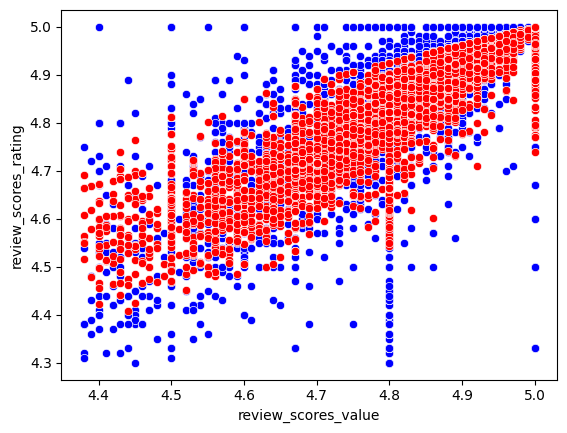

In [16]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_value', y='review_scores_rating', color="blue", data=df)
sns.scatterplot(x='review_scores_value', y='Predicciones', color="red", data=df)

In [17]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.6594290311215163

In [18]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.8120523573769836

Host_acceptance_rate

In [22]:
# --- Encontrar variables más correlacionadas con una variable dependiente ---
# Variable dependiente (puedes cambiarla aquí)
var_dep = "host_acceptance_rate"

# Calculamos todas las correlaciones de esa variable con el resto
correls = df.corr(numeric_only=True)[var_dep].drop(var_dep)   # quitamos la propia variable

# Ordenamos por valor absoluto de mayor a menor
correls_abs = correls.abs().sort_values(ascending=False)

# Mostramos el top 5 (o el número que quieras)
print(f"Variables más correlacionadas con {var_dep}:\n")
print(correls_abs.head(5))

# Si quieres ver también el signo original:
print("\nCon signo original:\n")
print(correls.loc[correls_abs.index[:5]])

Variables más correlacionadas con host_acceptance_rate:

instant_bookable          0.216214
maximum_nights_avg_ntm    0.163894
minimum_maximum_nights    0.163721
maximum_maximum_nights    0.155687
availability_365          0.093106
Name: host_acceptance_rate, dtype: float64

Con signo original:

instant_bookable          0.216214
maximum_nights_avg_ntm    0.163894
minimum_maximum_nights    0.163721
maximum_maximum_nights    0.155687
availability_365          0.093106
Name: host_acceptance_rate, dtype: float64


In [49]:
#Declaramos las variables dependientes e independientes para la regresión lineal LAS MAS ALTAS en el general
Vars_Indep= df[['instant_bookable', 'maximum_nights_avg_ntm','minimum_maximum_nights']]
Var_Dep= df['host_acceptance_rate']

In [50]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [51]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [52]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.06668986981562208

In [53]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.2582438185429074

host_is_superhost

In [54]:
# --- Encontrar variables más correlacionadas con una variable dependiente ---
# Variable dependiente (puedes cambiarla aquí)
var_dep = "host_is_superhost"

# Calculamos todas las correlaciones de esa variable con el resto
correls = df.corr(numeric_only=True)[var_dep].drop(var_dep)   # quitamos la propia variable

# Ordenamos por valor absoluto de mayor a menor
correls_abs = correls.abs().sort_values(ascending=False)

# Mostramos el top 5 (o el número que quieras)
print(f"Variables más correlacionadas con {var_dep}:\n")
print(correls_abs.head(5))

# Si quieres ver también el signo original:
print("\nCon signo original:\n")
print(correls.loc[correls_abs.index[:5]])

Variables más correlacionadas con host_is_superhost:

estimated_occupancy_l365d      0.377678
review_scores_rating           0.357076
estimated_revenue_l365d        0.346718
review_scores_communication    0.325521
Predicciones                   0.317971
Name: host_is_superhost, dtype: float64

Con signo original:

estimated_occupancy_l365d      0.377678
review_scores_rating           0.357076
estimated_revenue_l365d        0.346718
review_scores_communication    0.325521
Predicciones                   0.317971
Name: host_is_superhost, dtype: float64


In [55]:
#Declaramos las variables dependientes e independientes para la regresión lineal LAS MAS ALTAS en el general
Vars_Indep= df[['estimated_occupancy_l365d', 'review_scores_rating','estimated_revenue_l365d']]
Var_Dep= df['host_is_superhost']

In [56]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [58]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [59]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.24888435757446825

In [60]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.4988831101314899

host_total_listings_count

In [61]:
# --- Encontrar variables más correlacionadas con una variable dependiente ---
# Variable dependiente (puedes cambiarla aquí)
var_dep = "host_total_listings_count"

# Calculamos todas las correlaciones de esa variable con el resto
correls = df.corr(numeric_only=True)[var_dep].drop(var_dep)   # quitamos la propia variable

# Ordenamos por valor absoluto de mayor a menor
correls_abs = correls.abs().sort_values(ascending=False)

# Mostramos el top 5 (o el número que quieras)
print(f"Variables más correlacionadas con {var_dep}:\n")
print(correls_abs.head(5))

# Si quieres ver también el signo original:
print("\nCon signo original:\n")
print(correls.loc[correls_abs.index[:5]])

Variables más correlacionadas con host_total_listings_count:

calculated_host_listings_count                 0.642858
calculated_host_listings_count_entire_homes    0.576308
review_scores_rating                           0.167497
Predicciones                                   0.163485
review_scores_value                            0.148337
Name: host_total_listings_count, dtype: float64

Con signo original:

calculated_host_listings_count                 0.642858
calculated_host_listings_count_entire_homes    0.576308
review_scores_rating                          -0.167497
Predicciones                                  -0.163485
review_scores_value                           -0.148337
Name: host_total_listings_count, dtype: float64


In [62]:
#Declaramos las variables dependientes e independientes para la regresión lineal LAS MAS ALTAS en el general
Vars_Indep= df[['calculated_host_listings_count', 'calculated_host_listings_count_entire_homes','review_scores_rating']]
Var_Dep= df['host_total_listings_count']

In [63]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [64]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [65]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.4178503916852784

In [66]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.64641348352682

accommodates

In [68]:
# --- Encontrar variables más correlacionadas con una variable dependiente ---
# Variable dependiente (puedes cambiarla aquí)
var_dep = "accommodates"

# Calculamos todas las correlaciones de esa variable con el resto
correls = df.corr(numeric_only=True)[var_dep].drop(var_dep)   # quitamos la propia variable

# Ordenamos por valor absoluto de mayor a menor
correls_abs = correls.abs().sort_values(ascending=False)

# Mostramos el top 5 (o el número que quieras)
print(f"Variables más correlacionadas con {var_dep}:\n")
print(correls_abs.head(5))

# Si quieres ver también el signo original:
print("\nCon signo original:\n")
print(correls.loc[correls_abs.index[:5]])

Variables más correlacionadas con accommodates:

beds                       0.723959
bedrooms                   0.700020
bathrooms                  0.567192
price                      0.448937
estimated_revenue_l365d    0.193329
Name: accommodates, dtype: float64

Con signo original:

beds                       0.723959
bedrooms                   0.700020
bathrooms                  0.567192
price                      0.448937
estimated_revenue_l365d    0.193329
Name: accommodates, dtype: float64


In [69]:
#Declaramos las variables dependientes e independientes para la regresión lineal LAS MAS ALTAS en el general
Vars_Indep= df[['beds', 'bedrooms','bathrooms']]
Var_Dep= df['accommodates']

In [70]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [71]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [72]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.6228488050701352

In [73]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.7892077071786205

bedrooms

In [74]:
# --- Encontrar variables más correlacionadas con una variable dependiente ---
# Variable dependiente (puedes cambiarla aquí)
var_dep = "bedrooms"

# Calculamos todas las correlaciones de esa variable con el resto
correls = df.corr(numeric_only=True)[var_dep].drop(var_dep)   # quitamos la propia variable

# Ordenamos por valor absoluto de mayor a menor
correls_abs = correls.abs().sort_values(ascending=False)

# Mostramos el top 5 (o el número que quieras)
print(f"Variables más correlacionadas con {var_dep}:\n")
print(correls_abs.head(5))

# Si quieres ver también el signo original:
print("\nCon signo original:\n")
print(correls.loc[correls_abs.index[:5]])

Variables más correlacionadas con bedrooms:

accommodates               0.700020
bathrooms                  0.664494
beds                       0.636731
price                      0.518793
estimated_revenue_l365d    0.169192
Name: bedrooms, dtype: float64

Con signo original:

accommodates               0.700020
bathrooms                  0.664494
beds                       0.636731
price                      0.518793
estimated_revenue_l365d    0.169192
Name: bedrooms, dtype: float64


In [75]:
#Declaramos las variables dependientes e independientes para la regresión lineal LAS MAS ALTAS en el general
Vars_Indep= df[['accommodates', 'bathrooms','beds']]
Var_Dep= df['bedrooms']

In [76]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [77]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [78]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.6066672793691097

In [79]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.7788884896884212

price

In [80]:
# --- Encontrar variables más correlacionadas con una variable dependiente ---
# Variable dependiente (puedes cambiarla aquí)
var_dep = "price"

# Calculamos todas las correlaciones de esa variable con el resto
correls = df.corr(numeric_only=True)[var_dep].drop(var_dep)   # quitamos la propia variable

# Ordenamos por valor absoluto de mayor a menor
correls_abs = correls.abs().sort_values(ascending=False)

# Mostramos el top 5 (o el número que quieras)
print(f"Variables más correlacionadas con {var_dep}:\n")
print(correls_abs.head(5))

# Si quieres ver también el signo original:
print("\nCon signo original:\n")
print(correls.loc[correls_abs.index[:5]])

Variables más correlacionadas con price:

bedrooms                   0.518793
bathrooms                  0.502938
accommodates               0.448937
beds                       0.415004
estimated_revenue_l365d    0.162898
Name: price, dtype: float64

Con signo original:

bedrooms                   0.518793
bathrooms                  0.502938
accommodates               0.448937
beds                       0.415004
estimated_revenue_l365d    0.162898
Name: price, dtype: float64


In [81]:
#Declaramos las variables dependientes e independientes para la regresión lineal LAS MAS ALTAS en el general
Vars_Indep= df[['bedrooms', 'bathrooms','accommodates']]
Var_Dep= df['price']

In [82]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [83]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [84]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.3205454307740213

In [85]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.5661673169426343

review_scores_value

In [86]:
# --- Encontrar variables más correlacionadas con una variable dependiente ---
# Variable dependiente (puedes cambiarla aquí)
var_dep = "review_scores_value"

# Calculamos todas las correlaciones de esa variable con el resto
correls = df.corr(numeric_only=True)[var_dep].drop(var_dep)   # quitamos la propia variable

# Ordenamos por valor absoluto de mayor a menor
correls_abs = correls.abs().sort_values(ascending=False)

# Mostramos el top 5 (o el número que quieras)
print(f"Variables más correlacionadas con {var_dep}:\n")
print(correls_abs.head(5))

# Si quieres ver también el signo original:
print("\nCon signo original:\n")
print(correls.loc[correls_abs.index[:5]])

Variables más correlacionadas con review_scores_value:

Predicciones                   0.887030
review_scores_rating           0.720315
review_scores_accuracy         0.677213
review_scores_cleanliness      0.603252
review_scores_communication    0.559896
Name: review_scores_value, dtype: float64

Con signo original:

Predicciones                   0.887030
review_scores_rating           0.720315
review_scores_accuracy         0.677213
review_scores_cleanliness      0.603252
review_scores_communication    0.559896
Name: review_scores_value, dtype: float64


In [87]:
#Declaramos las variables dependientes e independientes para la regresión lineal LAS MAS ALTAS en el general
Vars_Indep= df[['review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness']]
Var_Dep= df['review_scores_value']

In [88]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [89]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [90]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.5865847714778262

In [91]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.7658882238798467

bathrooms

In [92]:
# --- Encontrar variables más correlacionadas con una variable dependiente ---
# Variable dependiente (puedes cambiarla aquí)
var_dep = "bathrooms"

# Calculamos todas las correlaciones de esa variable con el resto
correls = df.corr(numeric_only=True)[var_dep].drop(var_dep)   # quitamos la propia variable

# Ordenamos por valor absoluto de mayor a menor
correls_abs = correls.abs().sort_values(ascending=False)

# Mostramos el top 5 (o el número que quieras)
print(f"Variables más correlacionadas con {var_dep}:\n")
print(correls_abs.head(5))

# Si quieres ver también el signo original:
print("\nCon signo original:\n")
print(correls.loc[correls_abs.index[:5]])

Variables más correlacionadas con bathrooms:

bedrooms                   0.664494
accommodates               0.567192
beds                       0.561820
price                      0.502938
estimated_revenue_l365d    0.165034
Name: bathrooms, dtype: float64

Con signo original:

bedrooms                   0.664494
accommodates               0.567192
beds                       0.561820
price                      0.502938
estimated_revenue_l365d    0.165034
Name: bathrooms, dtype: float64


In [93]:
#Declaramos las variables dependientes e independientes para la regresión lineal LAS MAS ALTAS en el general
Vars_Indep= df[['bedrooms', 'accommodates','beds']]
Var_Dep= df['bathrooms']

In [94]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [95]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [96]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.47754314827297495

In [97]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.6910449683435768

reviews_per_month

In [98]:
# --- Encontrar variables más correlacionadas con una variable dependiente ---
# Variable dependiente (puedes cambiarla aquí)
var_dep = "reviews_per_month"

# Calculamos todas las correlaciones de esa variable con el resto
correls = df.corr(numeric_only=True)[var_dep].drop(var_dep)   # quitamos la propia variable

# Ordenamos por valor absoluto de mayor a menor
correls_abs = correls.abs().sort_values(ascending=False)

# Mostramos el top 5 (o el número que quieras)
print(f"Variables más correlacionadas con {var_dep}:\n")
print(correls_abs.head(5))

# Si quieres ver también el signo original:
print("\nCon signo original:\n")
print(correls.loc[correls_abs.index[:5]])

Variables más correlacionadas con reviews_per_month:

estimated_occupancy_l365d    0.479040
last_review_num              0.349107
estimated_revenue_l365d      0.348447
number_of_reviews            0.226253
Unnamed: 0                   0.225700
Name: reviews_per_month, dtype: float64

Con signo original:

estimated_occupancy_l365d    0.479040
last_review_num              0.349107
estimated_revenue_l365d      0.348447
number_of_reviews            0.226253
Unnamed: 0                   0.225700
Name: reviews_per_month, dtype: float64


In [99]:
#Declaramos las variables dependientes e independientes para la regresión lineal LAS MAS ALTAS en el general
Vars_Indep= df[['estimated_occupancy_l365d', 'last_review_num','estimated_revenue_l365d']]
Var_Dep= df['reviews_per_month']

In [100]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [101]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [102]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.3226505220107404

In [103]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.5680233463606407